In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
data = pd.read_csv("data/heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print("")

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

sex
[1 0]

cp
[3 2 1 0]

trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]

fbs
[1 0]


## Split into X and y

In [14]:
X = data.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y = data["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Fix the Categorical Data

In [124]:
X_use = pd.get_dummies(X, columns=["cp",
                                  "restecg",
                                  "slope",
                                  "thal"])

In [125]:
X_use.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


## Split the Data

In [126]:
import sklearn

In [127]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_use, y, test_size=0.3, random_state=42)

## Make a first Decision Tree

In [128]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

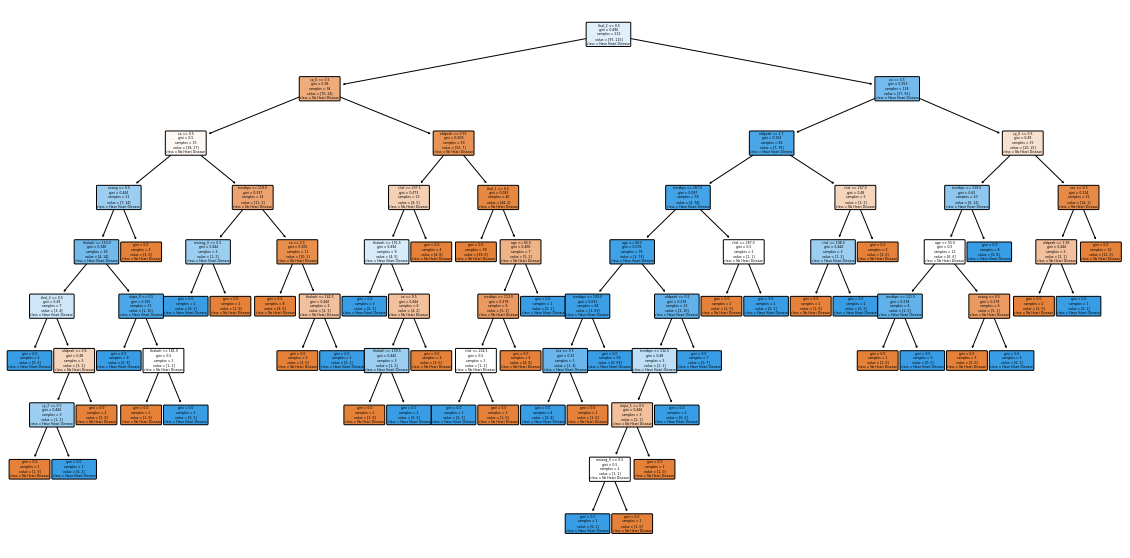

In [129]:
plt.figure(figsize=(20, 10))

plot_tree(clf,
         filled=True,
         rounded=True,
         class_names = ["No Heart Disease", "Have Heart Disease"],
         feature_names=X_use.columns)

plt.show()

In [130]:
print(clf.score(X_test, y_test))

0.7472527472527473


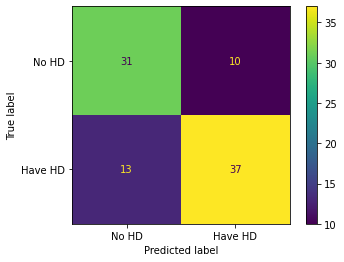

In [131]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["No HD", "Have HD"])

## Prune The Tree

In [132]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-3]

In [133]:
clf_prune1 = []

for i in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=i)
    clf_dt.fit(X_train, y_train)
    clf_prune1.append(clf_dt)

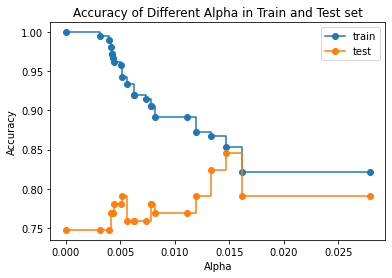

In [134]:
fig, ax = plt.subplots()

ax.set_title("Accuracy of Different Alpha in Train and Test set")
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alphas, [i.score(X_train, y_train) for i in clf_prune1], marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, [i.score(X_test, y_test) for i in clf_prune1], marker="o", label="test", drawstyle="steps-post")

ax.legend()

plt.show()

Only for first sight of how different alphas result different. From that we can say alpha around 0.02 is the best

## Use cv instead

In [135]:
alpha_loop = []

for i in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=i)
    scores = sklearn.model_selection.cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop.append([i, np.mean(scores), np.std(scores)])

In [136]:
alpha_result = pd.DataFrame(alpha_loop, columns=["alpha","score","std"])

<AxesSubplot:xlabel='alpha'>

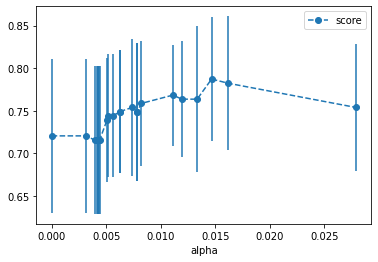

In [137]:
alpha_result.plot(x="alpha",
                 y="score",
                 yerr="std",
                 marker="o",
                 linestyle="--")

In [140]:
alpha_result[(alpha_result["alpha"] > 0.01)
            &
            (alpha_result["alpha"] < 0.015)
            &
            (alpha_result["score"] > 0.78)]

,alpha,score,std
20,0.014675,0.787229,0.072425


In [141]:
ideal_ccp = float(alpha_result[(alpha_result["alpha"] > 0.01)
            &
            (alpha_result["alpha"] < 0.015)
            &
            (alpha_result["score"] > 0.78)]["alpha"])

In [142]:
ideal_ccp

0.01467505241090147

In [143]:
clf_prune = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp)
clf_prune.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01467505241090147, random_state=42)

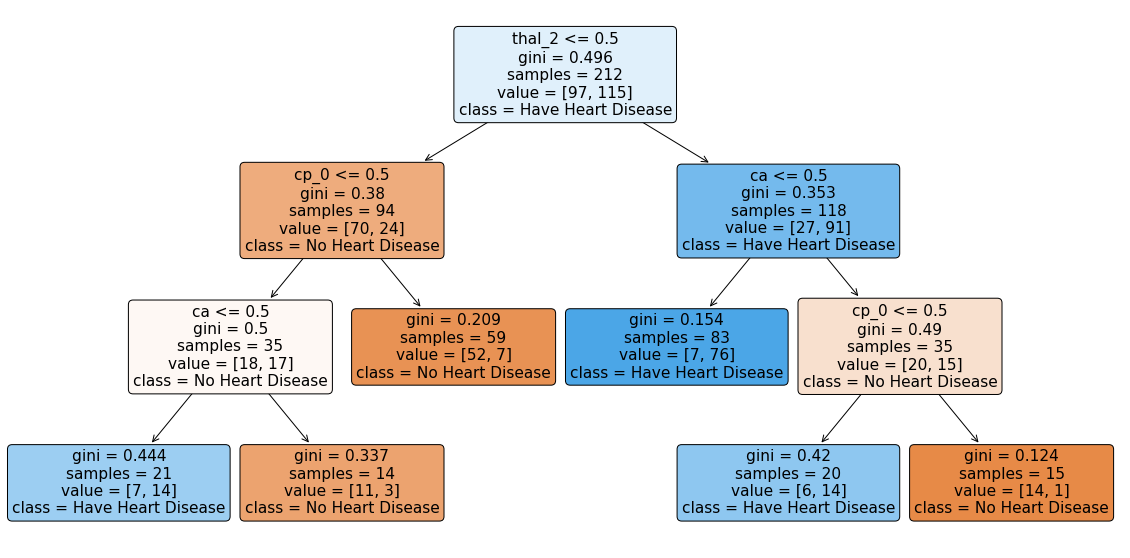

In [144]:
plt.figure(figsize=(20, 10))

plot_tree(clf_prune,
         filled=True,
         rounded=True,
         class_names = ["No Heart Disease", "Have Heart Disease"],
         feature_names=X_use.columns)

plt.show()

In [150]:
print(clf_prune.score(X_test, y_test))

0.8461538461538461


Hooorayy, we got the better score, from 74% to 84% with a smaller tree

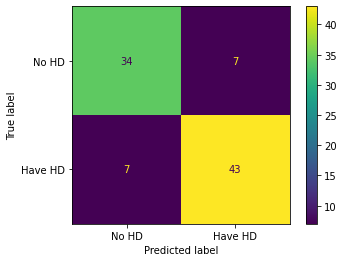

In [264]:
plot_confusion_matrix(clf_prune, X_test, y_test, display_labels=["No HD", "Have HD"])

## Try using RandomSearch

In [299]:
from scipy.stats import randint
parameters = {'max_depth' : (3,5,7,9,12,15,20,25)
              , 'criterion' : ['gini', 'entropy']
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6,8,10),
              "min_samples_leaf": randint(1, 9),
              "ccp_alpha":ccp_alphas
             }

In [300]:
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions = parameters, cv = 5, verbose = True)

In [301]:
DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'ccp_alpha': array([0.        , 0.00314465, 0.00393082, 0.00417908, 0.00428816,
       0.00428816, 0.00430799, 0.00440252, 0.00509297, 0.00519344,
       0.00566038, 0.00628931, 0.00628931, 0.00737156, 0.00786164,
       0.00786164, 0.00822448, 0.01112759, 0.01194969, 0.01334686,
       0.01467505, 0.01621743, 0.02792445]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': (3, 5, 7, 9, 12, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CA31EAE670>,
                                        'min_samples_split': (2, 4, 6, 8

In [302]:
DT_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01467505241090147, max_depth=12,
                       max_features='log2', min_samples_leaf=4,
                       min_samples_split=8, random_state=42)

In [303]:
clf_rs = DecisionTreeClassifier(ccp_alpha=0.01467505241090147, max_depth=12,
                       max_features='log2', min_samples_leaf=4,
                       min_samples_split=8, random_state=42)

In [304]:
clf_rs.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01467505241090147, max_depth=12,
                       max_features='log2', min_samples_leaf=4,
                       min_samples_split=8, random_state=42)

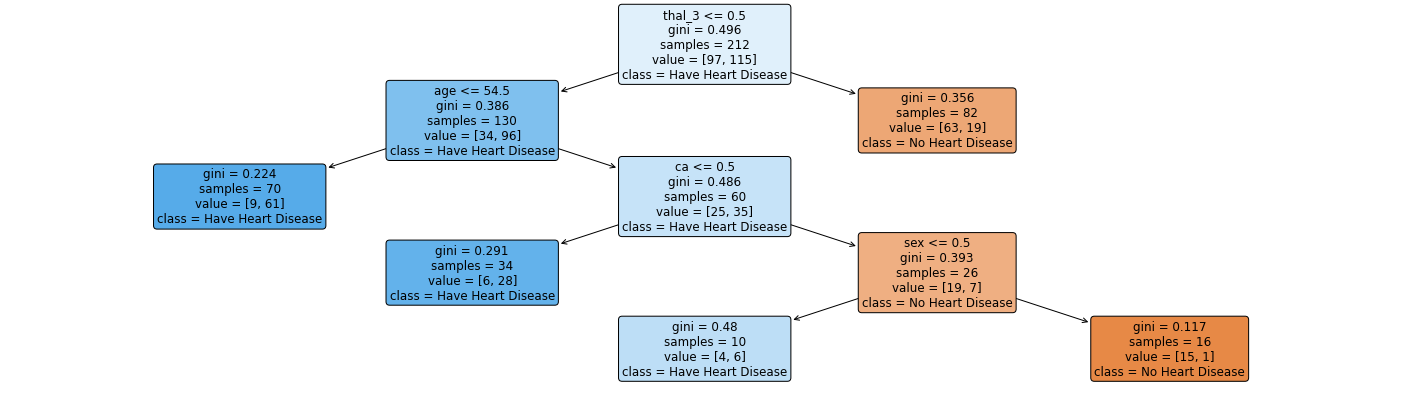

In [317]:
plt.figure(figsize=(25, 7))

plot_tree(clf_rs,
         filled=True,
         rounded=True,
         class_names = ["No Heart Disease", "Have Heart Disease"],
         feature_names=X_use.columns)

plt.show()

In [306]:
print(clf_rs.score(X_test, y_test))

0.8021978021978022


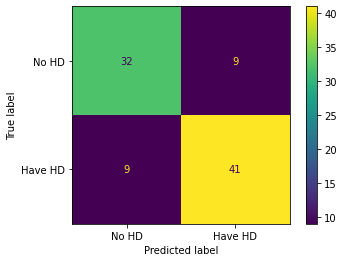

In [307]:
plot_confusion_matrix(clf_rs, X_test, y_test, display_labels=["No HD", "Have HD"])

We also increase the accuracy using randomsearch (to 80%). But, the number is still lower than the model that tuned using ccp